<a href="https://colab.research.google.com/github/genaiconference/Agentic_RAG_Workshop/blob/main/03_traditional_rag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Traditional RAG

In [ ]:
!git clone https://github.com/genaiconference/Agentic_RAG_Workshop.git

Cloning into 'Agentic_RAG_Workshop'...
remote: Enumerating objects: 476, done.
remote: Counting objects: 100% (247/247), done.
remote: Compressing objects: 100% (179/179), done.
remote: Total 476 (delta 148), reused 96 (delta 68), pack-reused 229 (from 2)
Receiving objects: 100% (476/476), 74.98 MiB | 9.71 MiB/s, done.
Resolving deltas: 100% (214/214), done.
Updating files: 100% (69/69), done.


## Setup and Installations
Install necessary libraries.

In [ ]:
!pip install -r /content/Agentic_RAG_Workshop/requirements.txt --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.6/19.6 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.9/187.9 kB 13.0 MB/s eta

## Load Environment Variables and Initialize Clients
Load environment variables containing API keys and endpoint information.

In [ ]:
import os

os.chdir("/content/Agentic_RAG_Workshop/")

from dotenv import load_dotenv
from langchain_openai import ChatOpenAI, OpenAIEmbeddings

load_dotenv()

llm = ChatOpenAI(
    api_key=os.getenv("OPENAI_API_KEY"),
    model="gpt-4.1",
    temperature=0,
)

embeddings = OpenAIEmbeddings(
    api_key=os.getenv("OPENAI_API_KEY"),
    model="text-embedding-3-small"
)

## Initialize Langfuse Handler for Tracing

In [ ]:
from langfuse.langchain import CallbackHandler
from langfuse import get_client

os.environ["LANGFUSE_PUBLIC_KEY"] = os.getenv("LANGFUSE_PUBLIC_KEY")
os.environ["LANGFUSE_SECRET_KEY"] = os.getenv("LANGFUSE_SECRET_KEY")
os.environ["LANGFUSE_HOST"] = "https://cloud.langfuse.com"

langfuse = get_client()

# Verify connection
if langfuse.auth_check():
    print("Langfuse client is authenticated and ready!")
else:
    print("Authentication failed. Please check your credentials and host.")

langfuse_handler = CallbackHandler()

Langfuse client is authenticated and ready!


## Create Retrievers for all data sources

Use the Retriever Pipeline which does the following:

- Load DI Output
- Generate Parent docs
- Create Child docs
- Generate Summaries
- Generate Question docs
- Create Chroma DB
- Create MVR Retriever
- Create BM25 Retriever
- Create Ensemble Retriever

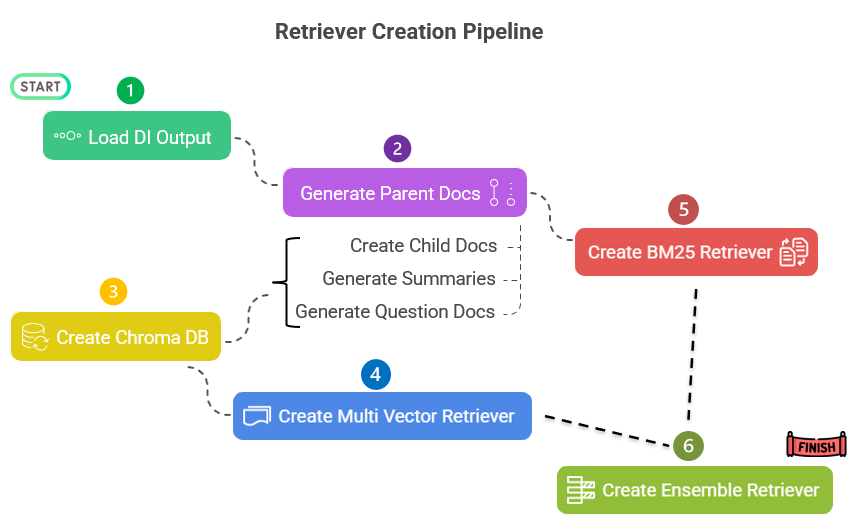

In [ ]:
from multivector_utils import create_retriever_pipeline

### Retriever for Insurance Policy Document

In [ ]:
insurance_policy_retriever = create_retriever_pipeline(
    di_results_filename="Insurance_Policy_results.pkl",
    source_file_name="Insurance_Policy",
    vector_db_name="chroma-insurance-policy",
    embeddings_model=embeddings,
    llm_model=llm,
    vectorstore_exists=True
)

### Retriever for Leave Policy Document

In [ ]:
leave_policy_retriever = create_retriever_pipeline(
    di_results_filename="Leave_Policy_results.pkl",
    source_file_name="Leave_Policy",
    vector_db_name="chroma-leave-policy",
    embeddings_model=embeddings,
    llm_model=llm,
    vectorstore_exists=True
)

### Retriever for Microsoft 2023 & 2024 Documents

In [ ]:
MS23_retriever = create_retriever_pipeline(
    di_results_filename="Microsoft_2023_results.pkl",
    source_file_name="Microsoft_2023",
    vector_db_name="chroma-microsoft-2023",
    embeddings_model=embeddings,
    llm_model=llm,
    vectorstore_exists=True
)

In [ ]:
MS24_retriever = create_retriever_pipeline(
    di_results_filename="Microsoft_2024_results.pkl",
    source_file_name="Microsoft_2024",
    vector_db_name="chroma-microsoft-2024",
    embeddings_model=embeddings,
    llm_model=llm,
    vectorstore_exists=True
)

### Retriever for Apple 2023 & 2024 Documents

In [ ]:
AP23_retriever = create_retriever_pipeline(
    di_results_filename="Apple_2023_results.pkl",
    source_file_name="Apple_2023",
    vector_db_name="chroma-apple-2023",
    embeddings_model=embeddings,
    llm_model=llm,
    vectorstore_exists=True
)

In [ ]:
AP24_retriever = create_retriever_pipeline(
    di_results_filename="Apple_2024_results.pkl",
    source_file_name="Apple_2024",
    vector_db_name="chroma-apple-2024",
    embeddings_model=embeddings,
    llm_model=llm,
    vectorstore_exists=True
)

## Traditional RAG

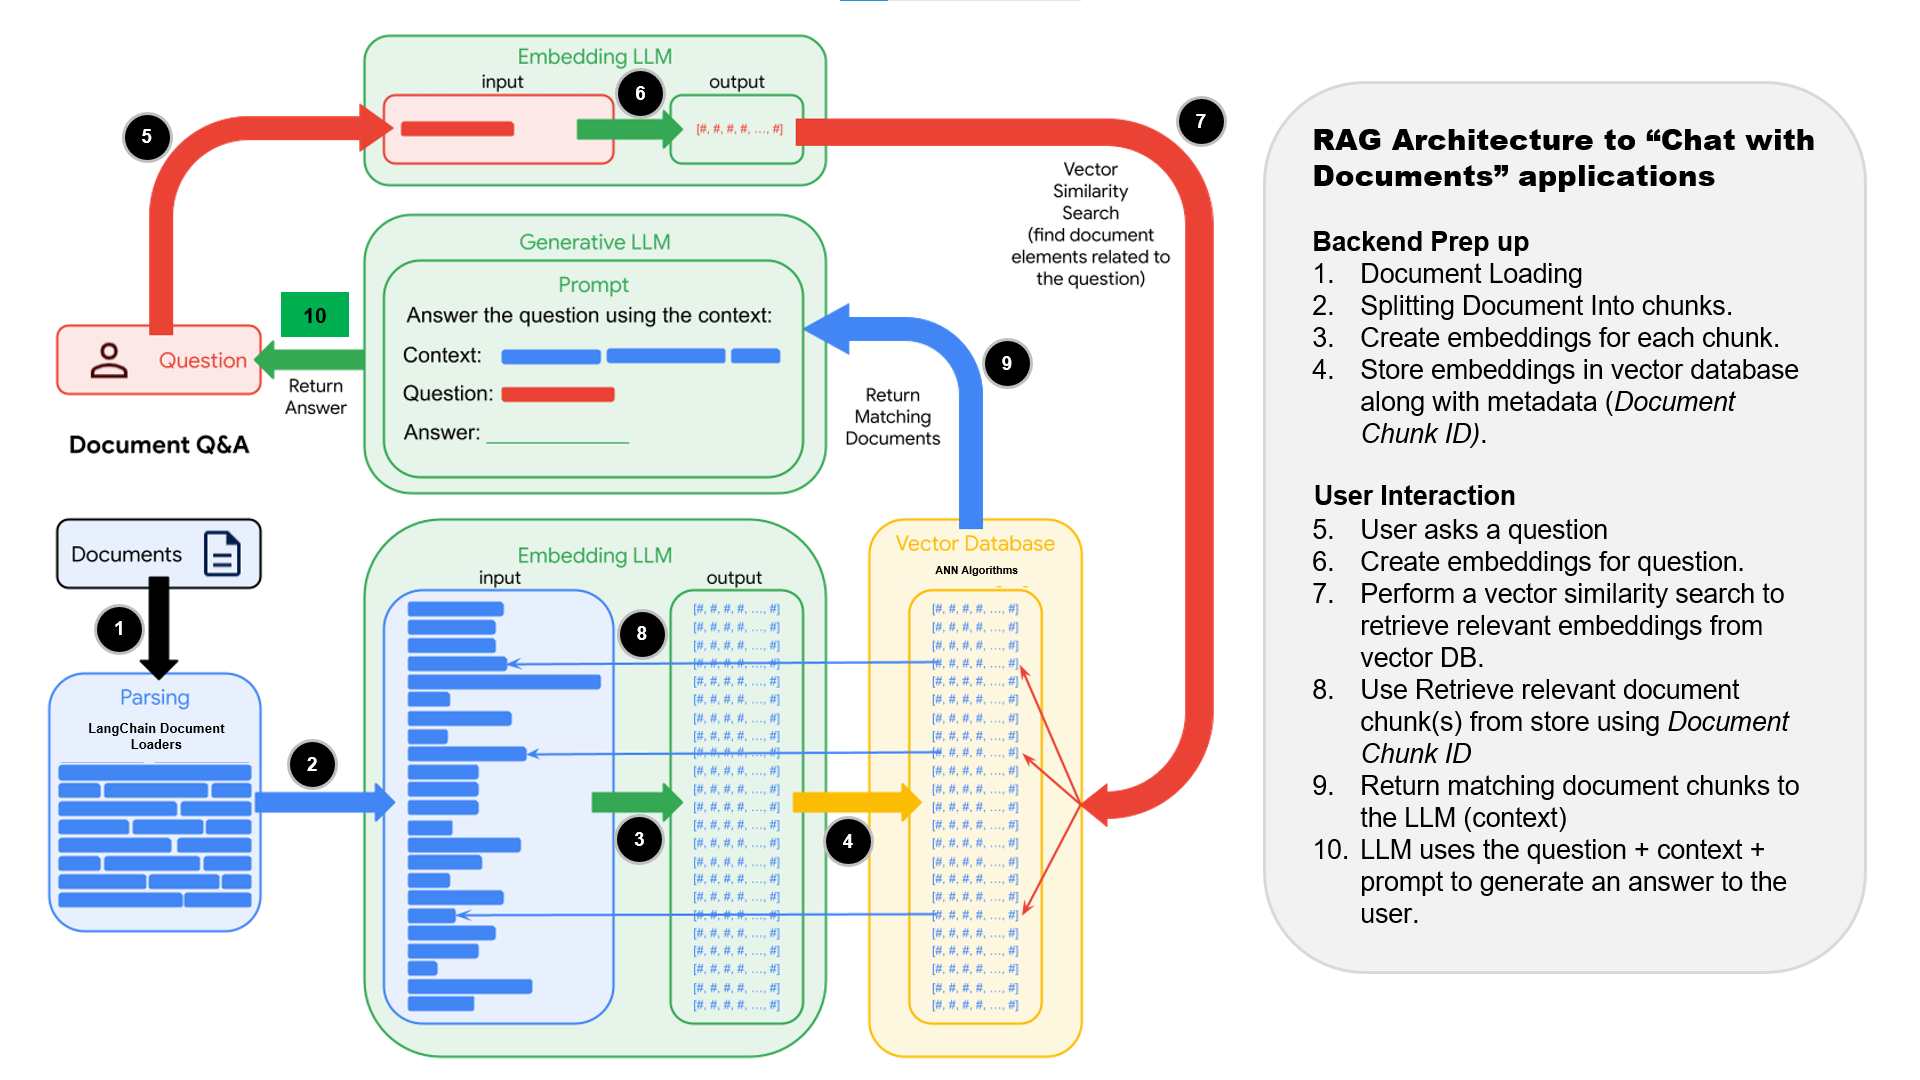

### Define Prompt

In [ ]:
from langchain.prompts import ChatPromptTemplate

template = """You are an assistant for question-answering tasks. Follow these rules:

- Use the provided context to answer the question.
- If the answer is not found in the context, say **"I don't know"**.
- Keep the response concise (maximum three sentences).
- Format the response in **clear, readable markdown**.
- If the answer contains multiple points, present them as **bullet points**.
- Do **not** use filler phrases like *"as per context"* or *"provide context"*.

**Question:** {input}

**Context:**
{context}

**Answer:**
"""

prompt = ChatPromptTemplate.from_template(template)


## Combine all Retrievers using LOTR - MergerRetriever

**Lord of the Retrievers (LOTR)**, also known as **MergerRetriever**, takes a list of retrievers as input and merges the results of their get_relevant_documents() methods into a single list. The merged results will be a list of documents that are relevant to the query and that have been ranked by the different retrievers.

The MergerRetriever class can be used to improve the accuracy of document retrieval in a number of ways. First, it can combine the results of multiple retrievers, which can help to reduce the risk of bias in the results. Second, it can rank the results of the different retrievers, which can help to ensure that the most relevant documents are returned first.

In [ ]:
from langchain.retrievers import MergerRetriever

# The Lord of the Retrievers will hold the output of all retrievers and can be used as any other retriever on different types of chains.
lotr = MergerRetriever(retrievers=[insurance_policy_retriever,
                                   leave_policy_retriever,
                                   MS23_retriever,
                                   MS24_retriever,
                                   AP23_retriever,
                                   AP24_retriever])

### Create Simple RAG Chain

In [ ]:
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain

# Create a chain to combine documents
combine_docs_chain = create_stuff_documents_chain(llm, prompt)

# Create a retrieval chain
rag_chain = create_retrieval_chain(lotr, combine_docs_chain)

### Test Q&A

In [ ]:
from IPython.display import Markdown

question = "I am planning to adopt a kid. How many leaves can I avail and What are the Insurance benefits I can get? What are the latest adoption policies of Indian Government as of 2025?"
response = rag_chain.invoke({"input": question},config={"callbacks": [langfuse_handler]})

display(Markdown(response["answer"]))

```markdown
### Adoption Leave Entitlement
- You are eligible for **26 weeks of Parental Leave** following the adoption of a child.
- This leave must be availed within one year of the child's adoption.

### Insurance Benefits
- Your group medical plan covers:
  - Inpatient hospitalization (including room rent, doctor’s fees, ICU, nursing, medicines, diagnostics, prosthetics, organ transplantation costs except the organ itself).
  - Pre-hospitalization expenses up to 30 days before admission and post-hospitalization expenses up to 60 days after discharge, if related to the same condition.
  - Maternity benefits (for biological children) and newborn coverage from day 1, but infertility and sterilization treatments are excluded.
- For claims, ensure dependents (including adopted children) are registered within 15 days of adoption.

### Latest Indian Government Adoption Policies (as of 2025)
- **I don't know.**
```

In [ ]:
question = "Compare the profits of Microsoft & Apple in 2024"
response = rag_chain.invoke({"input": question}, config={"callbacks": [langfuse_handler]})

display(Markdown(response["answer"]))

### Microsoft vs. Apple Profits in 2024

- **Microsoft (Fiscal Year Ended June 30, 2024):**
  - Net income: **$88.1 billion**

- **Apple (Fiscal Year Ended September 28, 2024):**
  - Net income: **$93.7 billion**

- **Comparison:**
  - **Apple's net income ($93.7B) was higher than Microsoft's ($88.1B) in 2024.**

In [ ]:
question = "Compare the parental leave benefits offered in the company's leave policy with how insurance coverage handles maternity expenses, and check if Apple or Microsoft’s 10-K filings mention any associated employee benefit costs."
response = rag_chain.invoke({"input": question}, config={"callbacks": [langfuse_handler]})

display(Markdown(response["answer"]))

```markdown
### Parental Leave Benefits vs. Insurance Coverage for Maternity Expenses

**Parental Leave Benefits (Company Leave Policy):**
- Birthing mother and non-birthing parent are each eligible for 26 weeks of parental leave following birth, surrogacy, or adoption.
- Leave must be taken within one year of the child's birth/surrogacy/adoption and is not financially compensated if unused.

**Insurance Coverage for Maternity Expenses:**
- Maternity hospitalization (inpatient) is covered up to INR 75,000 for normal delivery and INR 1,00,000 for C-section (within sum insured, for up to two deliveries).
- Pre- and post-natal expenses are covered up to INR 5,000 over and above the maternity limit.
- Newborn baby is covered from day one, subject to HR intimation within 15 days.
- Pre-hospitalization (30 days) and post-hospitalization (60 days) expenses are reimbursable if related to the same condition.

### Apple and Microsoft 10-K Filings: Employee Benefit Costs

**Apple 10-K:**
- Discloses total share-based compensation expense ($11.7B in 2024), employee tax payments, and mentions a wide variety of global employee benefits (health, wellness, time away).
- Does not provide a specific breakdown of costs for parental leave or maternity benefits.

**Microsoft 10-K:**
- Reports stock-based compensation expense ($10.7B in 2024), employer-funded retirement benefits ($1.7B in 2024), and employee severance expenses.
- No specific line item or detailed disclosure for parental leave or maternity benefit costs.

**Summary Table:**

| Aspect                        | Parental Leave Policy                | Insurance Coverage (Maternity)         | Apple 10-K Disclosure         | Microsoft 10-K Disclosure      |
|-------------------------------|--------------------------------------|----------------------------------------|-------------------------------|-------------------------------|
| Duration/Limit                | 26 weeks per parent                  | INR 75,000/1,00,000 per delivery       | General benefits, no detail   | General benefits, no detail   |
| Coverage                      | Birth, surrogacy, adoption           | Hospitalization, pre/post-natal, baby  | Stock comp, wellness, etc.    | Stock comp, retirement, etc.  |
| Cost Disclosure in 10-K       | Not specified                        | Not specified                          | Not itemized                  | Not itemized                  |

**Conclusion:**  
- The leave policy provides time off, while insurance reimburses actual maternity-related medical expenses.
- Neither Apple nor Microsoft’s 10-K filings specify the costs associated with parental leave or maternity benefits; only aggregate employee benefit expenses are disclosed.
```

In [ ]:
question = "Can you provide a side-by-side comparison of paid leave, insurance coverage, and total employee-related expenditure for your company and for Apple and Microsoft, integrating calculations and policy details from all three sources?"
response = rag_chain.invoke({"input": question}, config={"callbacks": [langfuse_handler]})

display(Markdown(response["answer"]))

```markdown
## Side-by-Side Comparison: Paid Leave, Insurance Coverage, and Total Employee-Related Expenditure

| Category                | Your Company (Pradhiran)                                                                 | Apple (2024)                                                                                      | Microsoft (2024)                                                                                 |
|-------------------------|-----------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------|
| **Paid Leave**          | - Annual: 29 days (encashable on separation/retirement, up to 65 days accumulation)<br>- Sick: Open (no accumulation/encashment)<br>- Parental: 26 weeks (birth/surrogacy/adoption)<br>- Marriage: 2 days<br>- Bereavement: 2 days<br>- Relocation: 5 days<br>- Compensatory Off: 2 days/month (max, not encashable)<br>- Leave Without Pay: Max 30 days/year | - "Wide variety" of time-away benefits globally; specifics not detailed in 10-K<br>- Parental leave, sick leave, and other time-off policies referenced but not quantified in public filings | - Differentiated, competitive global leave policies; specifics not detailed in 10-K<br>- Wellbeing, hybrid work, and flexible time-off referenced; U.S. typically offers generous parental and sick leave, but no global numbers in filings |
| **Insurance Coverage**  | - Group Medical: Covers inpatient, pre/post hospitalization (30/60 days), maternity (INR 75,000/1,00,000), newborn from day 1, critical illness (voluntary), ambulance, dental (accident), congenital diseases, pre-existing diseases, day care, and more<br>- Group Personal Accident: Covers permanent/temporary disability or death<br>- Claims via TPA (Medi Assist), with detailed process and documentation | - Health, wellness, and insurance benefits globally; details not specified in 10-K<br>- U.S. employees typically receive medical, dental, vision, life, and disability insurance; global coverage varies by country | - "Differentiated benefits package" including physical, emotional, and financial wellness programs<br>- U.S. employees typically receive medical, dental, vision, life, and disability insurance; global coverage varies by country |
| **Total Employee-Related Expenditure** | - Not explicitly stated in context<br>- Insurance premium and leave encashment calculated on base salary; no aggregate cost data provided | - 2024 R&D expense: $31.4B (includes payroll, benefits, stock comp, etc.)<br>- 2024 SG&A: $26.1B<br>- 2024 share-based comp expense: $11.7B<br>- 2024 dividends: $15.2B<br>- 2024 share repurchase: $95.8B<br>- Total employees: ~164,000 | - 2024 R&D: $29.5B<br>- 2024 Sales & Marketing: $24.5B<br>- 2024 G&A: $7.6B<br>- 2024 stock-based comp: $10.7B<br>- 2024 dividends: $22.3B<br>- 2024 share repurchase: $12.0B<br>- Total employees: Not specified in 10-K, but ~221,000 (2023) |

### Notes:
- **Paid Leave:** Your company provides detailed, quantifiable leave entitlements; Apple and Microsoft reference comprehensive leave and wellbeing programs but do not publish global quantitative leave data in their 10-Ks.
- **Insurance Coverage:** Your company’s plan is detailed and India-specific; Apple and Microsoft offer broad global coverage, with U.S. plans typically including medical, dental, vision, life, and disability insurance.
- **Total Employee-Related Expenditure:** Only Apple and Microsoft disclose aggregate payroll, benefits, and stock compensation costs in their financial statements; your company does not provide this data in the context.

**Calculations/Policy Details:**
- Apple’s 2024 R&D + SG&A = $57.5B (includes payroll, benefits, stock comp, etc.).
- Microsoft’s 2024 R&D + Sales & Marketing + G&A = $61.6B (includes payroll, benefits, stock comp, etc.).
- Both Apple and Microsoft spend billions annually on share-based compensation and dividends, in addition to direct employee costs.
```
